#CRATERING

Just as last time, there are some preliminary cells (which you should run first everytime you start the notebook) followed by separate sections for each part of the experiment. Each part is self-contained, so you only need to run the preliminary cells and then the code within that section; you will not need to run anything in Part 1, for example, if you are working on Part 2.

# Preliminary cells
Run the following cells **every time** you start the notebook and before moving on to any individual part.

These cells load libraries and defines some useful functions. Later when you have more time, you can look closely at the code and try to understand what it is doing, but for now you can just run the cells by clicking `shift+enter` and moving on. (There is no output.)

In [ ]:
# These lines load important libraries into memory
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
from scipy import optimize

# Below are several functions we want to define
def average(x):
    sum = 0                  # initializes our running total to be zero and calls it "sum"
    for number in x:         # makes a loop over the list "x" 
        sum = sum + number   # adds the current item in the list (called "number" to the running total (called "sum")
    return(sum / len(x))     # divides the total by the number of items in the list

def standard_deviation(x):
    avg = average(x)
    variance = 0                                # initializes our running total to be zero and calls it "variance"
    for number in x:                            # makes a loop over the list "x" 
        variance = variance + (number - avg)**2 # adds the square of the difference between each item and the average  
    return(np.sqrt(variance/(len(x)-1)))        # divides the total by N-1

def standard_error(x):
    return(standard_deviation(x))/np.sqrt(len(x)) # divides the standard deviation by sqrt of the number of points

def t_prime(A, dA, B, dB=0):               # Calculates the t_prime value between A +/- dA and B +/- B
    return((A-B)/np.sqrt(dA**2 + dB**2))   # If only 3 arguments are given, assumes dB = 0 (e.g. a literature value)

In [ ]:
# These lines control how our figures look
%matplotlib inline
plt.rcParams['figure.dpi'] = 160 #Change this value to make your picture bigger or smaller

# Part 1 -- Making Craters
You can use these cells to do calculations and plot your data as you go.


The cell below first creates empty lists for energies (in Joules) and crater diameters (in centimeters). We then `append` (add to the end of) our experimental values that we have measured.

**To add more test energies, use `Energy.append(`energy`)` and `Crater_Width.append([`list of numbers`])`**






In [ ]:
# This creates empty lists
Energy = []
Crater_Width = []

# This is where you add the energy value and diameters for your first energy
# NOTE THE FORMATTING: the energy value is a single number, but the diameters is a list of number
#  enclosed in square brackets [...]. Don't forget the square brackets!
Energy.append(0.60)
Crater_Width.append([5.9, 5.8, 6.0, 6.05, 5.8, 5.9, 5.9])

# This is where you add the energy value and diameters for your second energy
Energy.append(0.51)
Crater_Width.append([5.6, 5.4, 5.6, 5.7, 5.8, 5.7, 6.0])

#This is your third energy and list of diameters, etc.
Energy.append(0.35)
Crater_Width.append([4.9, 5.0, 4.95, 5.1, 5.4, 5.0, 5.2])

Energy.append(0.17)
Crater_Width.append([4.3, 4.55, 4.5, 4.4, 4.5, 4.75, 4.4, 4.5])

Energy.append(0.12)
Crater_Width.append([3.75, 3.6, 3.8, 3.7, 3.55, 3.8, 3.85, 3.7])

Energy.append(0.08)
Crater_Width.append([3.55, 3.65, 3.6, 3.65, 3.45, 3.4])

Energy.append(0.05)
Crater_Width.append([2.9, 3.15, 3.0, 3.05, 3.05, 3.1, 3.0, 3.1])

# To add more data, copy and paste additional pairs of the `append` commands from above... one for each energy
# Energy.append()
# Crater_Width.append([])

Next we'll quickly plot each data set to make sure that we haven't done anything strange.

Re-run this plot every time you add values for a new energy to see how things are evolving!

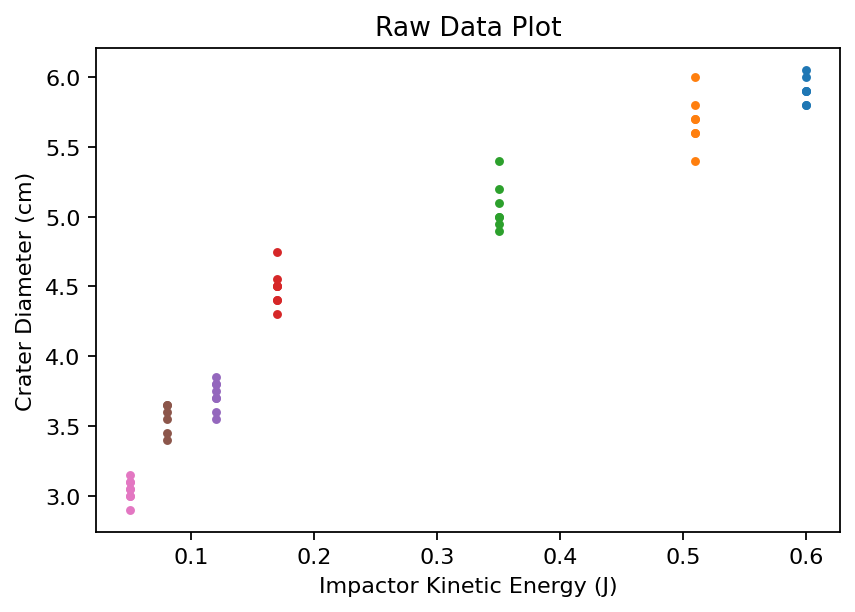

In [ ]:
fig,ax = plt.subplots()

# This is a loop that plots each energy in a different color
for n, Width in enumerate(Crater_Width):
    ax.scatter(np.full_like(Width,Energy[n]),Width,marker='.')

ax.set_title('Raw Data Plot')
ax.set_xlabel('Impactor Kinetic Energy (J)')
ax.set_ylabel('Crater Diameter (cm)')
plt.show()

Now that we've checked our data, let's find the average and uncertainty for each energy value.

In [ ]:
Crater_Width_Average = []
Crater_Width_Uncertainty = []

for n, Width in enumerate(Crater_Width):
    Crater_Width_Average.append(average(Width))
    Crater_Width_Uncertainty.append(standard_error(Width))
    print(Energy[n],"J   ", Crater_Width_Average[n],"+-",Crater_Width_Uncertainty[n],"cm")

@widgets.interact(A = widgets.FloatSlider(min=1, max=20, step=0.1, value=2),
                  B = widgets.FloatSlider(min=1, max=20, step=0.1, value=2),
                  maxK = widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                  logplot = widgets.Checkbox(value=False,
                                             description= 'log-log plot?'))

def update(A, B, maxK, logplot):
  fig,ax = plt.subplots()
  ax.errorbar(Energy, Crater_Width_Average, Crater_Width_Uncertainty, fmt='k.',
             markersize=2, capsize=3)
  X = np.linspace(0, maxK, 1000)
  ax.plot(X, A*X**(1/3), label='$A*K^{1/3}$')
  ax.plot(X, B*X**(1/4), label='$B*K^{1/4}$')
  if logplot == True:
    ax.set_xscale('log')
    ax.set_yscale('log')
  ax.set_title('Average Data Plot')
  ax.set_xlabel('Impactor Kinetic Energy, $K$, (J)')
  ax.set_ylabel('Crater Diameter (cm)')
  ax.legend()

0.6 J    5.9071428571428575 +- 0.035234877587973196 cm
0.51 J    5.685714285714286 +- 0.07046975517594636 cm
0.35 J    5.078571428571429 +- 0.06533534635243926 cm
0.17 J    4.4875 +- 0.04700873778960064 cm
0.12 J    3.71875 +- 0.03651993095753135 cm
0.08 J    3.5499999999999994 +- 0.04281744192888375 cm
0.05 J    3.0437500000000006 +- 0.027447189551677506 cm


interactive(children=(FloatSlider(value=2.0, description='A', max=20.0, min=1.0), FloatSlider(value=2.0, descr…

Record your average values, and don't forget to save your plots (right click and select "save as") and put copies in your lab notebook!

# Part 2 -- Understanding and applying the model

This part will fit your data to the competing models and help you make predictions for new craters.

Type in your energies, as well as the corresponding crater width averages and uncertainties. (You wrote those down last time, right? If not, you'll have to re-run the code in part one to calculate them again.)

In [ ]:
Energy = [0.0523, 0.032, 0.0665, 0.01, 0.0196, 0.0083, 0.004]
Crater_Width_Average = [5.723, 5.079, 5.917, 3.718, 4.488, 3.550, 3.044]
Crater_Width_Uncertainty = [0.10, 0.095, 0.089, 0.057, 0.087, 0.053, 0.067]

Next we define our two possible model functions,
 - The "1/3-power model": $D = A*K^{1/3}$
 - The "1/4-power model": $D = B*K^{1/4}$

and our residual function (which calculates the difference between the data and the fit function),
 - Residual on point $i$: $\chi_i = \frac{D_{fit} - D_i}{\delta D_i}$.

We can also define a general power law function that may be useful later,
 - The "general-power model": $D = C*K^x$.

In [ ]:
#Defines fit functions
def third_power(p, x):
  return(p[0]*np.array(x)**(1/3)).tolist()

def quarter_power(p, x):
  return(p[0]*np.array(x)**(1/4)).tolist()

def gen_power(p,x):
  return(p[0]*np.array(x)**p[1]).tolist()

def residual(p, function, x, y, dy):
  return ((function(p, np.array(x)) - np.array(y))/np.array(dy))

Next, we define a function that will perform a least-squares fit to a set of data. **This code is quite complex and you DO NOT need to understand it!**

The fit returns the best fit values (e.g. $A$ or $B$) and the uncertainties on that value (e.g. $\delta A$ or $\delta B$). It also returns the number of degrees of freedom, the chi-squared value, and the reduced chi-squared value:
 - Number of degrees of freedom, dof: $\nu$ = "number of data points" - "number of fit parameters" 
 - Chi-square: $\chi^2 = \sum_i^N \frac{(D_{fit} - D_i)^2}{\delta D_i^2}$
 - Reduced chi-square: $\chi^2/\nu$ 

In [ ]:
# The code below defines our data fitting function.
# Inputs are:
# a list of variable names
# initial guess for parameters p0
# the function we're fitting to
# the x,y, and dy variables
# tmi can be set to 1 or 2 if more intermediate data is needed

def data_fit(varnames, p0, func, xvar, yvar, err, tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),
                                     verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:", error)
        return p0, np.zeros_like(p0), -1, -1
    pf = fit['x']

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf), -1, -1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(np.diagonal(cov)) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared: {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof: {:.0f}'.format(dof))
    print('Reduced chi-squared (chi-squared/dof): {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]))
    for num in range(len(pf)):
        print('{:<11}'.format(varnames[num]),'|','{:<24.4f}'.format(pf[num]),'|','{:<24.4f}'.format(pferr[num]))
    print()
    return pf, pferr, chisq, dof

At the heart of this function is the idea of a **residual**. Residuals are a function of our data and the function we're fitting the data to. The residual for a point is the difference between the y-value of that datapoint and that of the function at the same point. It's a quantitative way of measuring how well a data and function agree with one another.

Often formulas will use the residual squared as a way of avoiding negative numbers since undershooting and overshooting points are equally bad.

The fitting algorithm above  will vary function parameters `p` repeatedly and keep changes that make the sum of the residuals (squared) smaller until it can't make any meaningful improvements. It also weights points by their uncertainties: points with large uncertanties are likely to be less representative of the underlying behavior than points with small uncertanties.

Let's see what it comes up with, and how far our data is from the fits.

Try to fit your data to the two models. Can you tell yet whether you have better agreement with one model over the other?

In [ ]:
# Fits
print('FIT: D = A*K^(1/3)')
print('-----')
third_fit, third_err, third_chisq, third_dof = data_fit(['A'], [1], third_power,
                        Energy, Crater_Width_Average, Crater_Width_Uncertainty)

print('FIT: D = B*K^(1/4)')
print('-----')
quarter_fit, quarter_err, quarter_chisq, quarter_dof = data_fit(['B'], [1], quarter_power,
                        Energy, Crater_Width_Average, Crater_Width_Uncertainty)

FIT: D = A*K^(1/3)
-----
Converged with chi-squared: 157.32
Number of degrees of freedom, dof: 6
Reduced chi-squared (chi-squared/dof): 26.22

Parameter   | Best fit values:         | Uncertainties in the best fit values:
A           | 16.2856                  | 0.1054                  

FIT: D = B*K^(1/4)
-----
Converged with chi-squared: 3.91
Number of degrees of freedom, dof: 6
Reduced chi-squared (chi-squared/dof): 0.65

Parameter   | Best fit values:         | Uncertainties in the best fit values:
B           | 11.8495                  | 0.0765                  



Next, let's plot the fits to see how they look compared to the data. 

In [ ]:
#Plots
@widgets.interact(logplot = widgets.Checkbox(value=False,
                                             description= 'log-log plot?'))

def update(logplot):
  fig,ax = plt.subplots()
  ax.errorbar(Energy, Crater_Width_Average, Crater_Width_Uncertainty, fmt='k.',
            label="Data", capsize=2)
  
  X = np.linspace(min(Energy), max(Energy), 5000)
  X_longer = np.linspace(0.25*min(Energy), 1.2*max(Energy), 5000)

  ax.plot(X_longer, third_power(third_fit, X_longer), 'b--')
  ax.plot(X, third_power(third_fit, X), 'b-', label="$A*K^{1/3}$")
  
  ax.plot(X_longer, quarter_power(quarter_fit, X_longer), 'r--')
  ax.plot(X, quarter_power(quarter_fit, X), 'r-', label="$B*K^{1/4}$")

  if logplot == True:
    ax.set_xscale('log')
    ax.set_yscale('log')

  ax.set_title("Power law fit Comparison")
  ax.set_ylabel("Crater Diameter (cm)")
  ax.set_xlabel("Energy (J)")
    
  ax.legend()

interactive(children=(Checkbox(value=False, description='log-log plot?'), Output()), _dom_classes=('widget-int…

It might still be a little hard to tell how far the data is from the fits, so let's make a plot of residuals for each of the two functions below. We'll also include the sum of the residuals squared (i.e. $\chi^2$) as a title so we don't have to do that by hand.

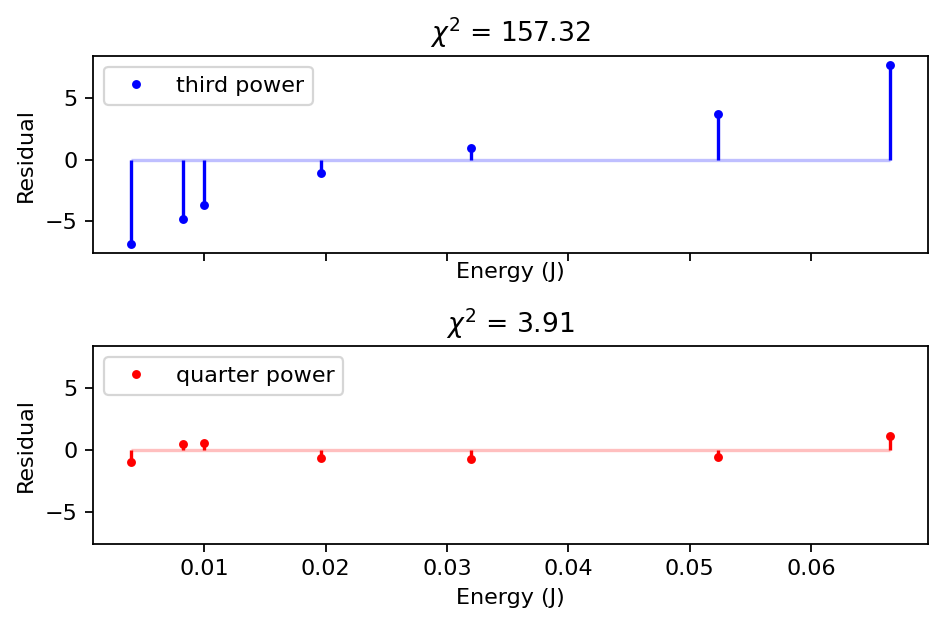

In [ ]:
fig,(ax,ay) = plt.subplots(2,1,sharex=True,sharey=True)

ax.plot(Energy,residual(third_fit,third_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty),'b.',label='third power')
ax.vlines(Energy,0,residual(third_fit,third_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty),'b')
ax.hlines(0,min(Energy),max(Energy),'b',alpha=0.25)
third_sum_residuals = sum(residual(third_fit,third_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty)**2)

ay.plot(Energy,residual(quarter_fit,quarter_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty),'r.',label='quarter power')
ay.vlines(Energy,0,residual(quarter_fit,quarter_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty),'r')
ay.hlines(0,min(Energy),max(Energy),'r',alpha=0.25)
quarter_sum_residuals = sum(residual(quarter_fit,quarter_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty)**2)

ax.set_ylabel("Residual")
ax.set_xlabel("Energy (J)")
ax.set_title("$\chi^2$ = {:.2f}".format(third_sum_residuals))
ax.legend(loc=2)

ay.set_ylabel("Residual")
ay.set_xlabel("Energy (J)")
ay.set_title("$\chi^2$ = {:.2f}".format(quarter_sum_residuals))
ay.legend(loc=2)

fig.tight_layout()
plt.show()

Do you find better agreement with one model over the other? What criteria are you using to make that decision?

Does either of your models show a trend in the residuals? (That is, do the residuals all fall too low in one part then too high in another part rather than randomly up and down all over?) What does this indicate about the quality of the fit?

Does it help to fit to a more general function where the exponent is itself a fit parameter? Maybe the best fit isn't to a 1/3- or 1/4-power law, but to something else?

In [ ]:
#Fit
print('FIT: D = C*K^x')
print('-----')
gen_fit, gen_err, gen_chisq, gen_dof = data_fit(['C', 'x'], [1, 0.5], gen_power,
                        Energy, Crater_Width_Average, Crater_Width_Uncertainty)

#Plots
@widgets.interact(logplot = widgets.Checkbox(value=False,
                                             description= 'log-log plot?'))

def update(logplot):
  fig,ax = plt.subplots()
  ax.errorbar(Energy, Crater_Width_Average, Crater_Width_Uncertainty, fmt='k.',
            label="Data", capsize=2)
  
  X = np.linspace(min(Energy), max(Energy), 5000)
  X_longer = np.linspace(0.1*min(Energy), 1.2*max(Energy), 5000)
  
  ax.plot(X_longer, third_power(third_fit, X_longer), 'b--')
  ax.plot(X, third_power(third_fit, X), 'b-', label="$A*K^{1/3}$")

  ax.plot(X_longer, quarter_power(quarter_fit, X_longer), 'r--')
  ax.plot(X, quarter_power(quarter_fit, X), 'r-', label="$B*K^{1/4}$")
  
  ax.plot(X_longer, gen_power(gen_fit, X_longer), 'g--')
  ax.plot(X, gen_power(gen_fit, X), 'g-', label="$C*K^x$")
  
  if logplot == True:
    ax.set_xscale('log')
    ax.set_yscale('log')

  ax.set_title("Power law fit Comparison")
  ax.set_ylabel("Crater Diameter (cm)")
  ax.set_xlabel("Energy (J)")
  
  ax.legend()

FIT: D = C*K^x
-----
Converged with chi-squared: 3.74
Number of degrees of freedom, dof: 5
Reduced chi-squared (chi-squared/dof): 0.75

Parameter   | Best fit values:         | Uncertainties in the best fit values:
C           | 11.7182                  | 0.3275                  
x           | 0.2472                   | 0.0069                  



interactive(children=(Checkbox(value=False, description='log-log plot?'), Output()), _dom_classes=('widget-int…

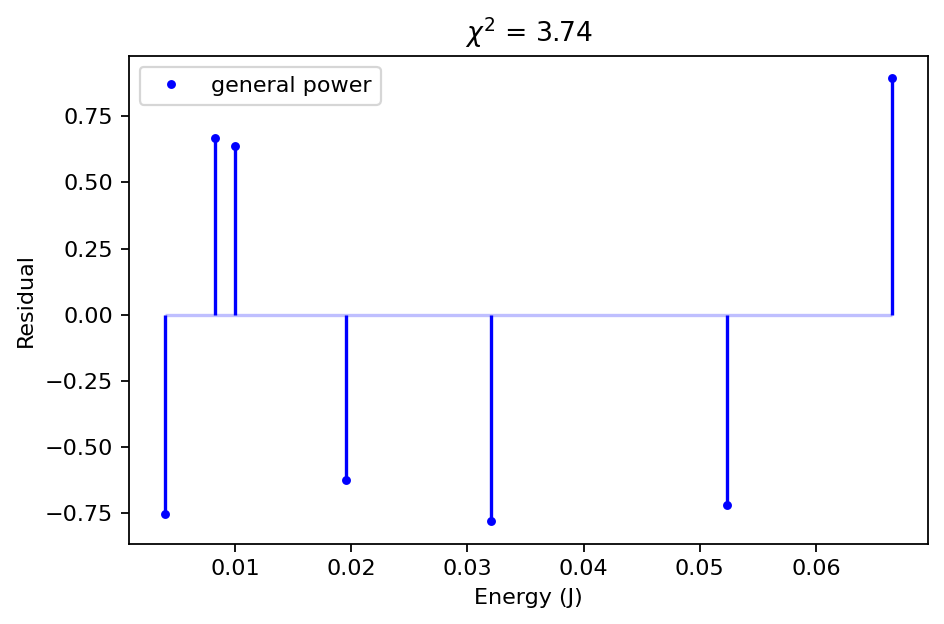

In [ ]:
fig,ax = plt.subplots()

ax.plot(Energy,residual(gen_fit,gen_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty),'b.',label='general power')
ax.vlines(Energy,0,residual(gen_fit,gen_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty),'b')
ax.hlines(0,min(Energy),max(Energy),'b',alpha=0.25)
gen_sum_residuals = sum(residual(gen_fit,gen_power,Energy,Crater_Width_Average,Crater_Width_Uncertainty)**2)

ax.set_ylabel("Residual")
ax.set_xlabel("Energy (J)")
ax.set_title("$\chi^2$ = {:.2f}".format(gen_sum_residuals))
ax.legend(loc=2)

fig.tight_layout()
plt.show()

Now, let's use our model to make predictions. Input an energy to predict a crater diameter.

In [ ]:
val = input("Enter an energy (in J) to see what your models predict for the crater diameter: ")
test_K = float(val)

D_third = third_power(third_fit, test_K)
dD_third = D_third*third_err[0]/third_fit[0]
D_quarter = quarter_power(quarter_fit, test_K)
dD_quarter = D_quarter*quarter_err[0]/quarter_fit[0]
D_gen = gen_power(gen_fit, test_K)
dD_gen = D_gen*np.sqrt((gen_err[0]/gen_fit[0])**2 + (gen_fit[1]*gen_err[1]/test_K)**2)

print("1/3-power prediction: ", D_third, " +/- ", dD_third, "cm")
print("1/4-power prediction: ", D_quarter," +/- ", dD_quarter, "cm")
print("general-power prediction: ", D_gen, " +/- ", dD_gen, "cm")

Enter an energy (in J) to see what your models predict for the crater diameter: 1.0
1/3-power prediction:  16.2855865943358  +/-  0.10542495018383671 cm
1/4-power prediction:  11.849452727480063  +/-  0.0764621869157053 cm
general-power prediction:  11.71820383479297  +/-  0.3281096393926646 cm
